In [1]:
import staircase as sc
from imports import *
%matplotlib inline


C:\Python38\lib\site-packages\cupy\_environment.py:207: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Python38\\lib\\site-packages\\cupy\\.data\\_wheel.json' mode='r' encoding='cp1252'>
  _preload_config = json.load(open(config_path))


In [2]:
df = pd.read_csv(r"../data/page_views.csv")

vsteps = Steps.read_dataframe(df,'start','ends')

df.shape

(947, 3)

<AxesSubplot:>

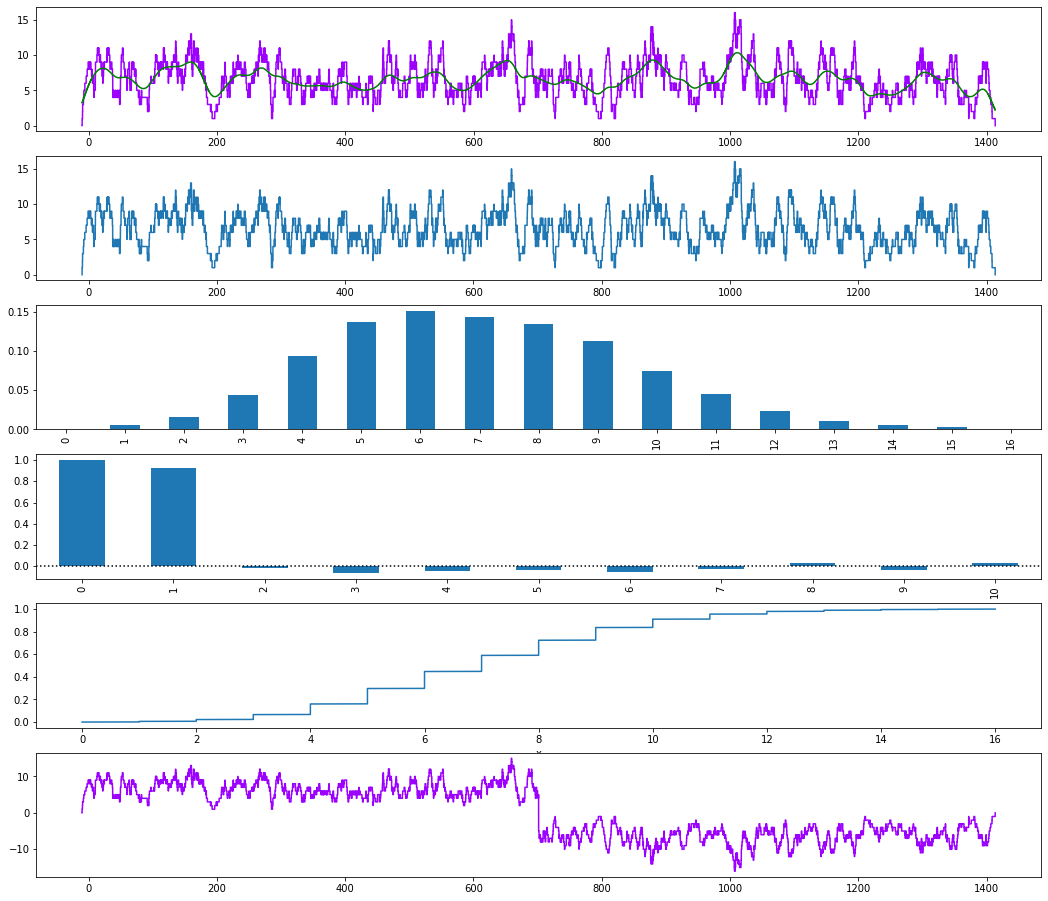

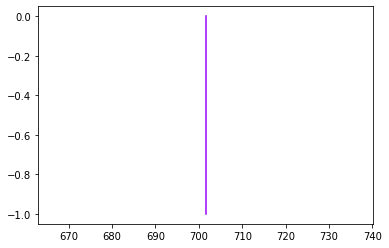

In [6]:
#p = np.arange(pd.Timestamp(2020,1,1), pd.Timestamp(2020,12,30), pd.Timedelta(hours=1)).astype(pd.Timestamp)
fig,ax = plt.subplots(nrows=6,figsize=(18,16))

st,se,span = vsteps.span()

haar = Step() - Step(st+0.5*span,weight=2)
#vsteps.rebase(tbase)
vs_clip = vsteps.clip(500,510)

vsteps.plot(ax=ax[0])
vsteps.smooth_plot(ax=ax[0],color='g',ts_grain=0.1,smooth_factor=15)

queue = sc.Stairs().layer(df.start, df.ends)
queue.plot(ax[1])

vsteps.histogram_plot(ax=ax[2],kind='bar')
xx = vsteps.pacf_plot(10,ax=ax[3],kind='bar')
xx.axhline(0,c='black',linestyle=':')
vsteps.ecdf_plot(ax=ax[4])

#vs_clip.plot(ax=ax[5])
(vsteps*haar).plot(ax=ax[5])
(haar).plot(plot_range=(st+0.5*span-10,st+0.5*span+10))

#vs_clip.smooth_plot(ax=ax[5],color='g',ts_grain=0.01,smooth_factor=1)

# print(queue.clip(500,510).integrate())

# print(vsteps.clip(500,510).integrate())
# print((vsteps*haar).integrate())
# print(st,se,span)